In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
from scipy.fftpack import fftfreq
from scipy import signal

## Unmodulated signal

In [2]:
f_signal = 1
A_signal = 1
samp_period = 0.0001
tvec = np.arange(0,4,samp_period/f_signal) # tijdsvector 
Inf_signal = A_signal * np.sin(2*np.pi*f_signal * tvec)



### Time

Text(0.5, 1.0, 'Information signal (time domain)')

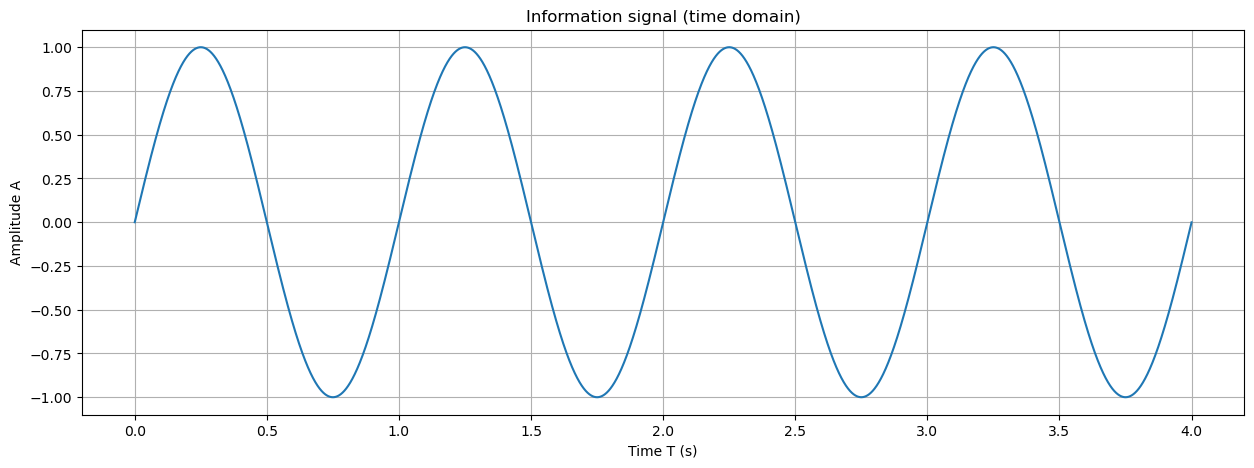

In [3]:
plt.figure(figsize = [15,5])
plt.plot(tvec,Inf_signal)
plt.xlabel('Time T (s)')
plt.ylabel('Amplitude A')
plt.title('Information signal (time domain)')

### frequency

C:\Users\abdel\AppData\Local\Temp\ipykernel_32456\906913571.py:12: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(fvec,Inf_signal_f,'r')


(-4.0, 4.0)

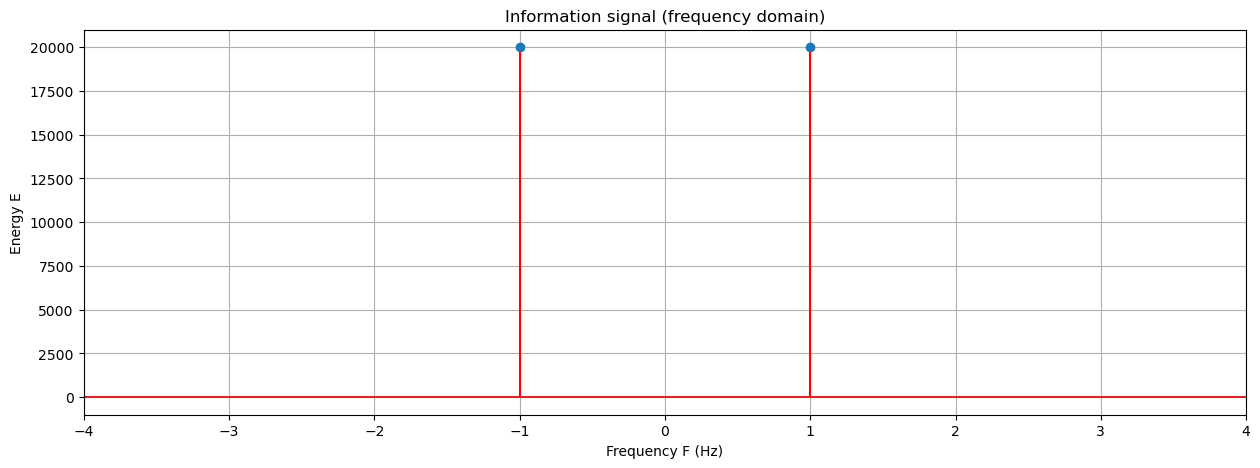

In [4]:
# fft (fast Fourier transform)


Inf_signal_f = np.abs(np.fft.fft(Inf_signal)) # magnitude 
Inf_signal_f[Inf_signal_f<2000] = None

fvec = fftfreq(Inf_signal.size, samp_period) # frequency vector
#arguments: number of samples in the signal,time between consecutive samples
# returns array of freq corresponding to the comp of the fft

plt.figure(2,figsize = [15,5])
plt.stem(fvec,Inf_signal_f,'r')
plt.xlabel('Frequency F (Hz)')
plt.ylabel('Energy E')
plt.title('Information signal (frequency domain)')
plt.xlim(-4,4)

## AM modulated signal

In [5]:
f_carier= 100
A_carier =1
carier = A_carier * np.sin(2*np.pi*f_carier * tvec)

AM_mod_signal = carier + Inf_signal*carier

### Time

Text(0.5, 1.0, 'AM modulated signal (time domain)')

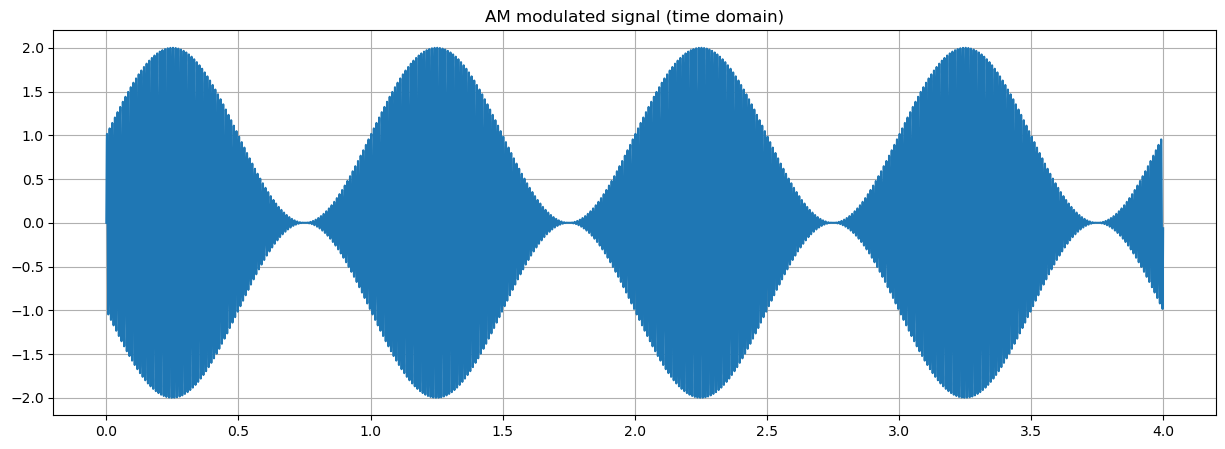

In [6]:
plt.figure(figsize = [15,5])
plt.plot(tvec,AM_mod_signal)
plt.title('AM modulated signal (time domain)')

### Frequency

Text(0.5, 1.0, 'AM modulated signal (frequency domain)')

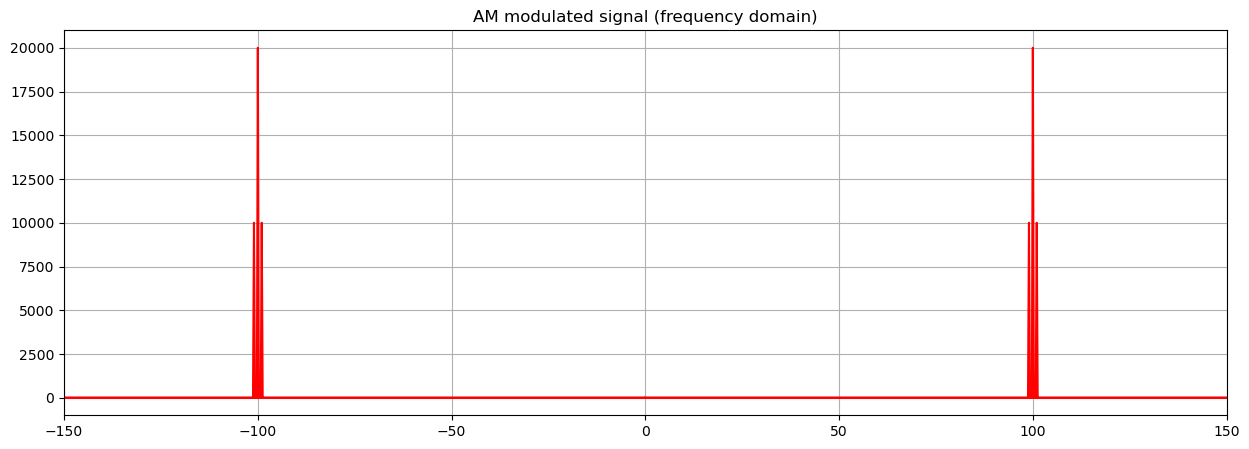

In [7]:
AM_mod_signal_f = np.abs(np.fft.fft(AM_mod_signal))

plt.figure(4,figsize = [15,5])
plt.plot(fvec,AM_mod_signal_f,'r-')
plt.xlim(-150,150)
plt.title('AM modulated signal (frequency domain)')

## I/Q components

In [8]:
I = AM_mod_signal*np.cos(2*np.pi*f_carier*tvec)
Q = AM_mod_signal*np.sin(2*np.pi*f_carier*tvec)

### I 

Text(0.5, 1.0, 'I (time domain)')

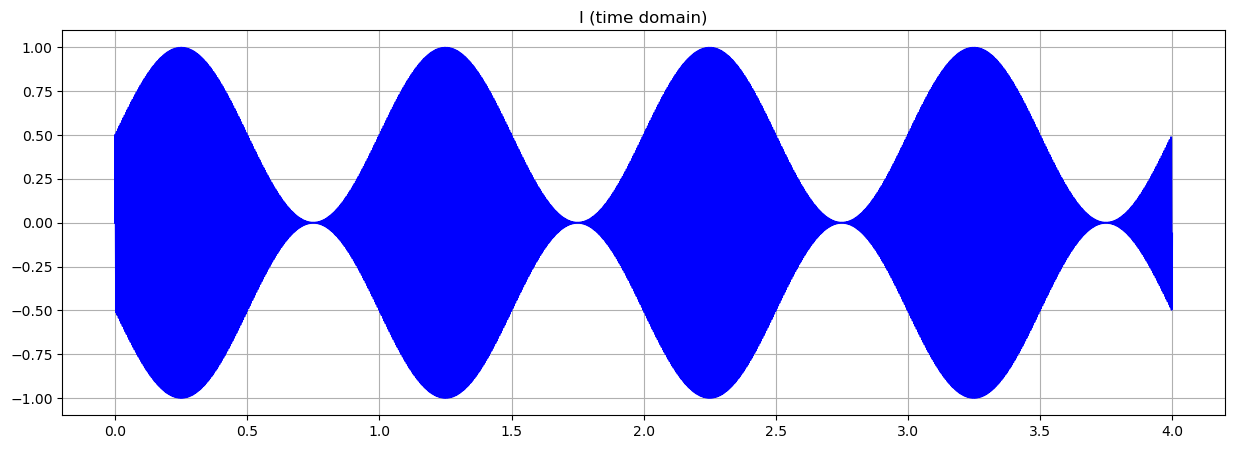

In [9]:
plt.figure(figsize = [15,5])
plt.plot(tvec,I,'b',label ='I')
plt.title('I (time domain)')

### Q

Text(0.5, 1.0, 'Q (time domain)')

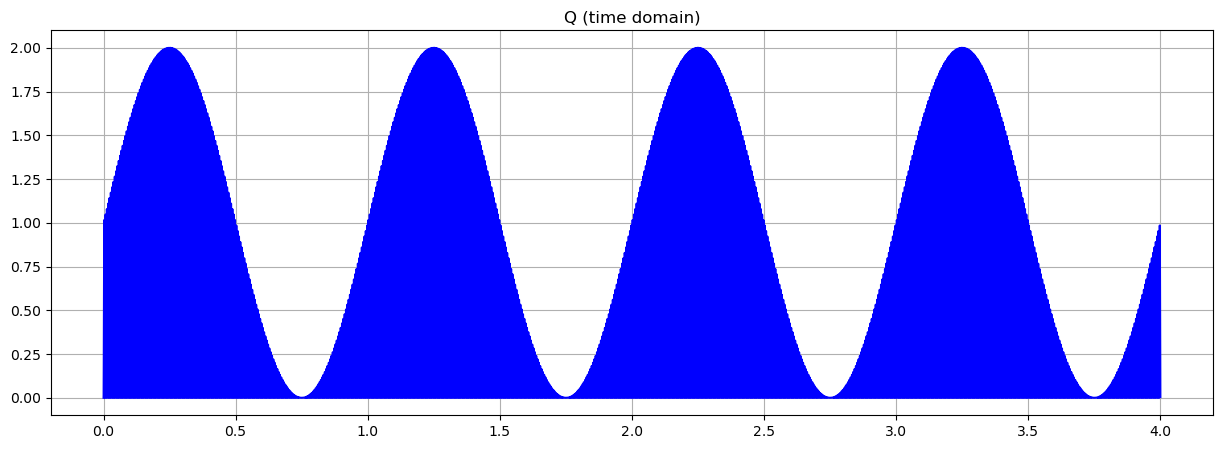

In [10]:
plt.figure(figsize = [15,5])
plt.plot(tvec,Q,'b',label ='I')
plt.title('Q (time domain)')

## Filtering the I/Q components

In [11]:
# coeff filter
nyq = 0.5 * (1/samp_period) # Nyquist frequency (which is half the sampling rate of the signal)
normal_cutoff = (20)/nyq

b, a = signal.butter(5, normal_cutoff, btype='low', analog=False)

I_filtered = signal.lfilter(b, a, I)
Q_filtered = signal.lfilter(b, a, Q)

### I filtered

Text(0.5, 1.0, 'I filtered (time domain)')

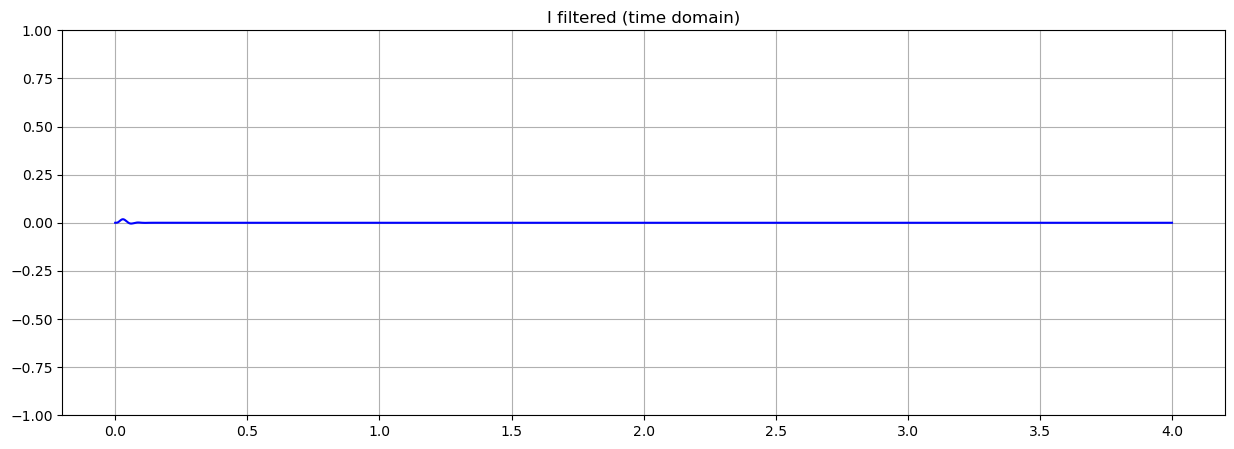

In [12]:
plt.figure(figsize = [15,5])
plt.plot(tvec,I_filtered,'b',label ='I')
plt.ylim(-1,1)
plt.title('I filtered (time domain)')

### Q filtered

Text(0.5, 1.0, 'Q filtered (time domain)')

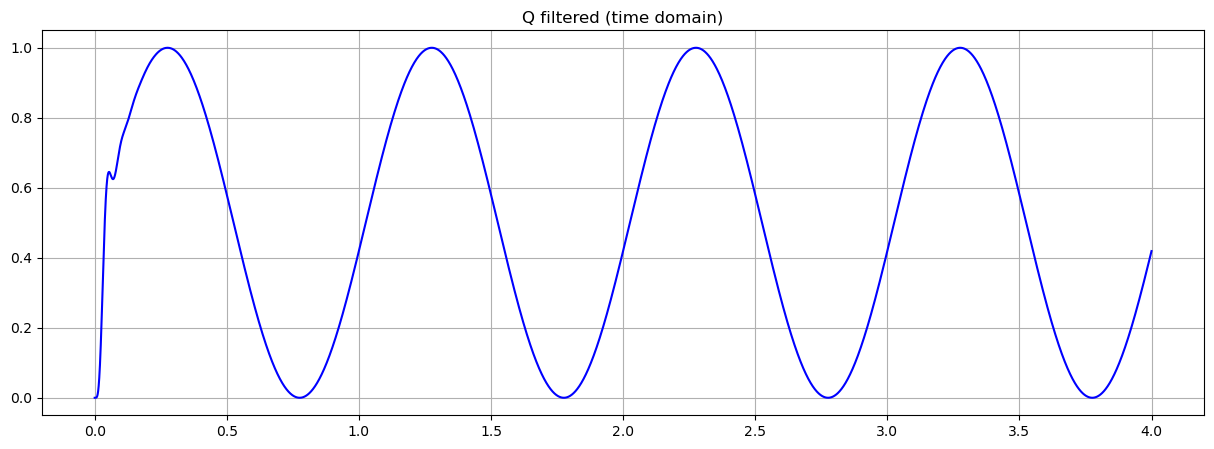

In [13]:
plt.figure(figsize = [15,5])
plt.plot(tvec,Q_filtered,'b',label ='I')
plt.title('Q filtered (time domain)')

## AM demodulated signal

In [14]:
IQ_signal = I + 1j*Q

AM_demod_signal = np.sqrt(np.power(np.imag(IQ_signal),2) + np.power(np.real(IQ_signal),2))
AM_demod_signal = signal.lfilter(b, a,AM_demod_signal)

### Time

Text(0.5, 1.0, 'Demodulated signal (time domain)')

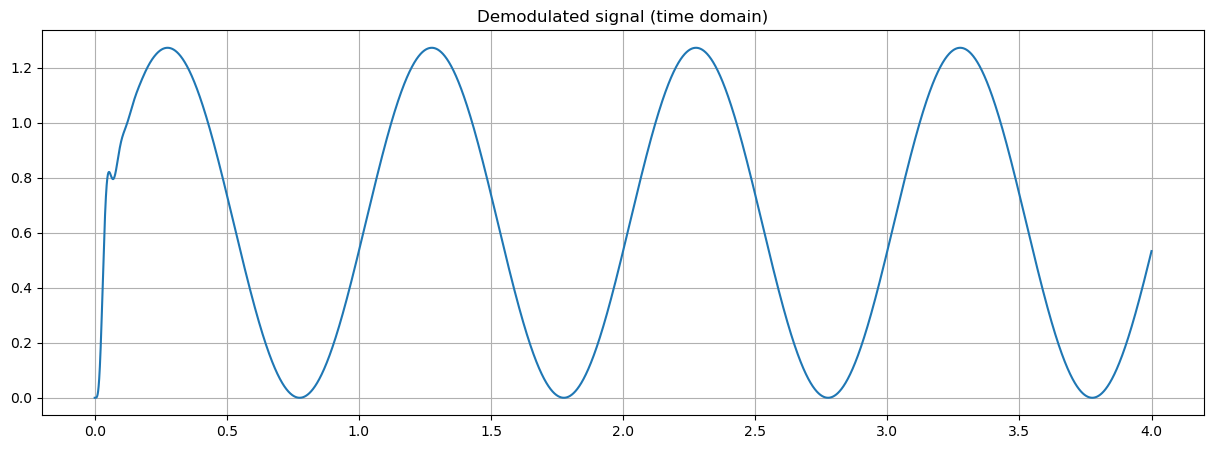

In [15]:
plt.figure(figsize = [15,5])
plt.plot(tvec,AM_demod_signal)
plt.title('Demodulated signal (time domain)')

### Frequency

C:\Users\abdel\AppData\Local\Temp\ipykernel_32456\741959665.py:5: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(fvec,AM_demod_signal_f,'r-')


Text(0.5, 1.0, 'Demodulated signal (frequency domain)')

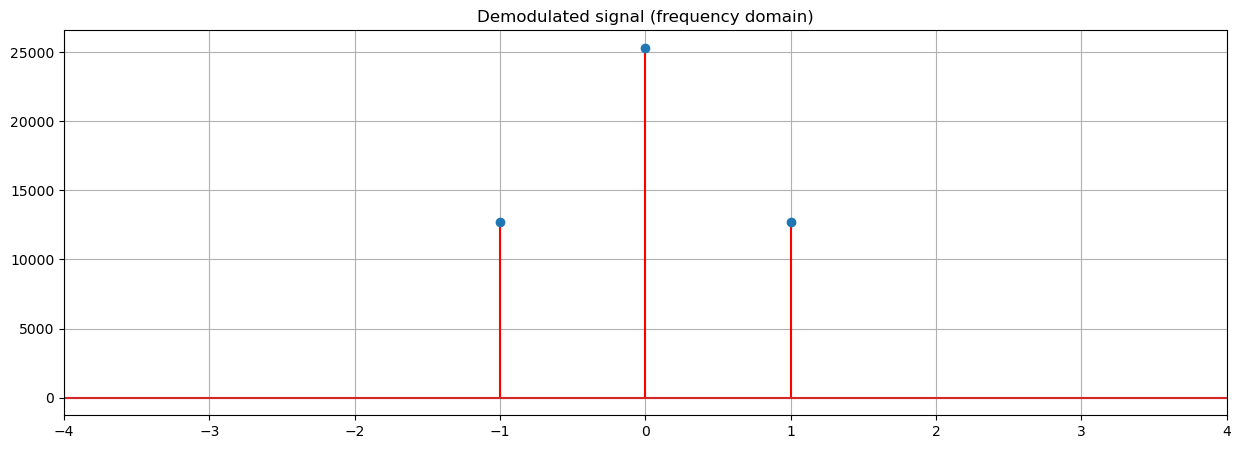

In [16]:
AM_demod_signal_f = np.abs(np.fft.fft(AM_demod_signal))
AM_demod_signal_f[AM_demod_signal_f<2000] = None

plt.figure(figsize = [15,5])
plt.stem(fvec,AM_demod_signal_f,'r-')
plt.xlim(-4,4)
plt.title('Demodulated signal (frequency domain)')

## FM modulated signal

In [17]:
FM_mod_signal = np.sin(2*np.pi * (f_carier +5* np.array(Inf_signal)) * tvec)

### Time

Text(0.5, 1.0, 'FM modulated signal (time domain)')

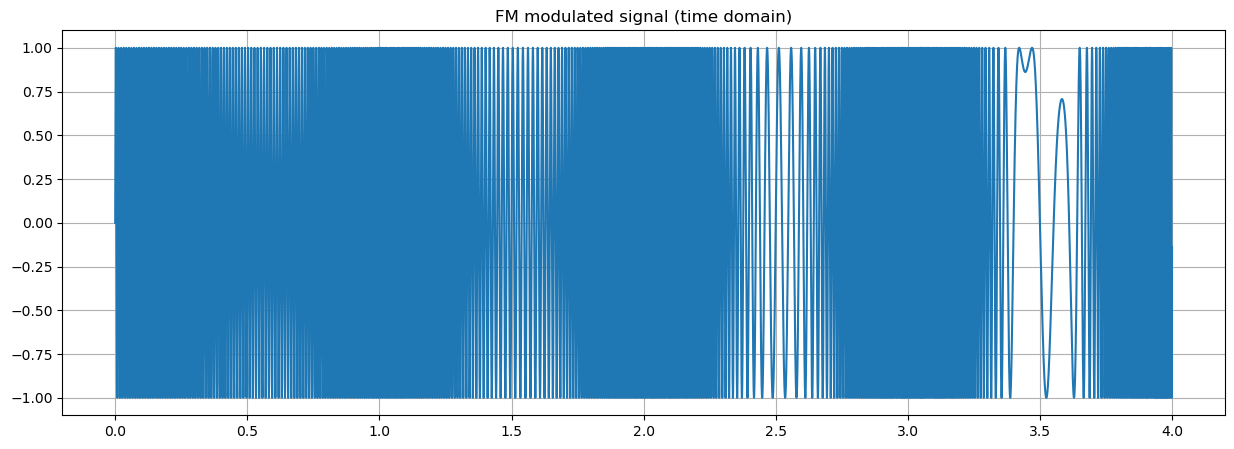

In [18]:
plt.figure(figsize = [15,5])
plt.plot(tvec,FM_mod_signal)
plt.title('FM modulated signal (time domain)')

### Frequency

Text(0.5, 1.0, 'FM modulated signal (time domain)')

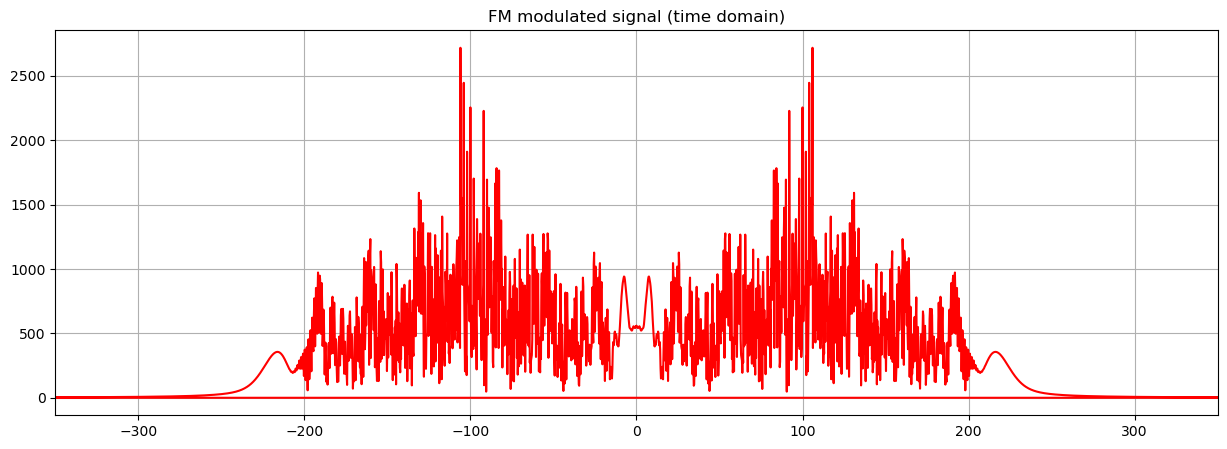

In [19]:
FM_mod_signal_f= np.abs(np.fft.fft(FM_mod_signal))

plt.figure(figsize = [15,5])
plt.plot(fvec,FM_mod_signal_f,'r-')
plt.xlim(-350,350)
plt.title('FM modulated signal (time domain)')

## I/Q components

In [20]:
I = FM_mod_signal*np.cos(2*np.pi*f_carier*tvec)
Q = FM_mod_signal*np.sin(2*np.pi*f_carier*tvec)

### I

Text(0.5, 1.0, 'I (time domain)')

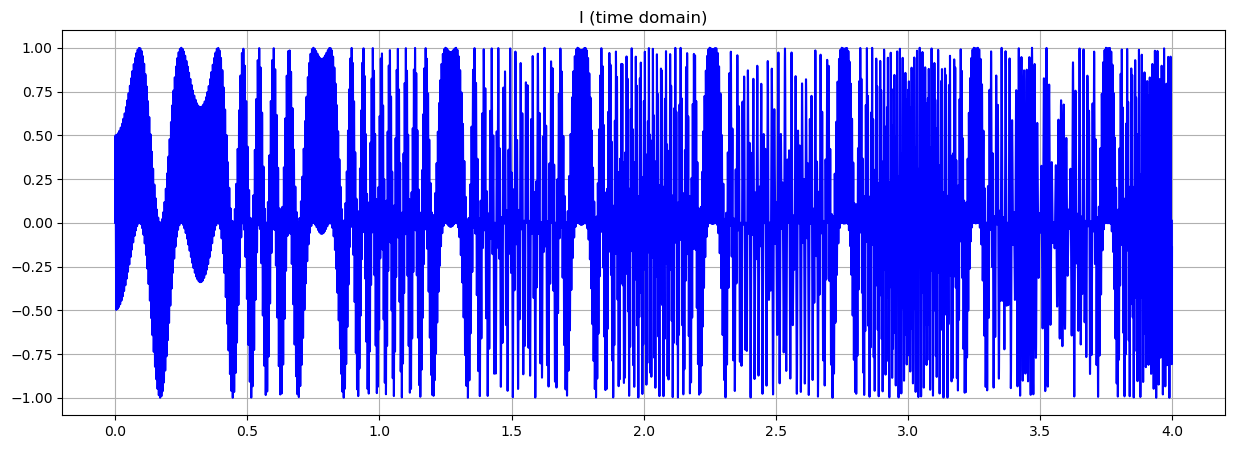

In [21]:
plt.figure(figsize = [15,5])
plt.plot(tvec,I,'b',label ='I')
plt.title('I (time domain)')

### Q

Text(0.5, 1.0, 'Q (time domain)')

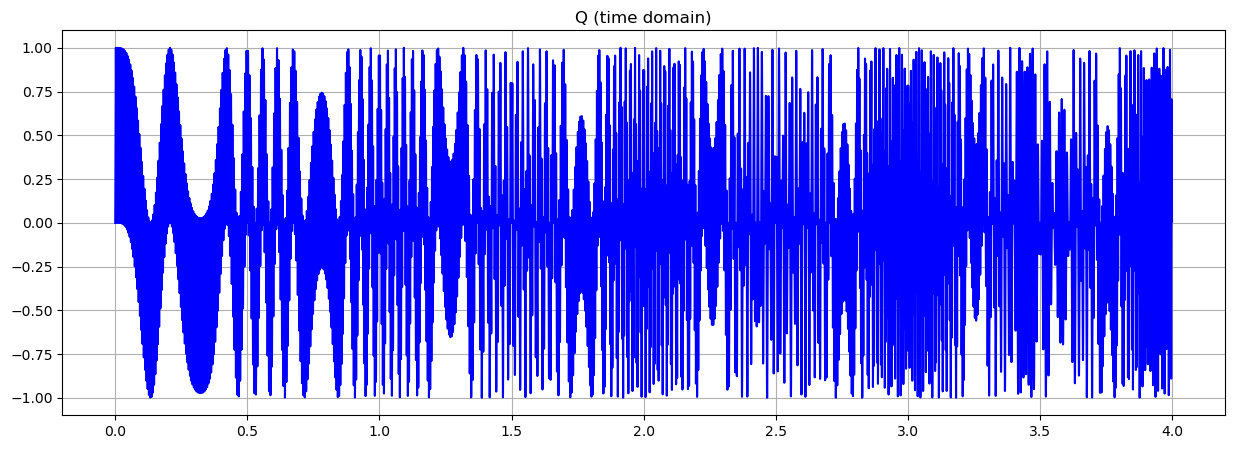

In [22]:
plt.figure(figsize = [15,5])
plt.plot(tvec,Q,'b',label ='Q')
plt.title('Q (time domain)')

## Filtering the I/Q components

In [23]:
I_filtered = signal.lfilter(b, a, I)
Q_filtered = signal.lfilter(b, a, Q)

### I filtered

Text(0.5, 1.0, 'I filtered (time domain)')

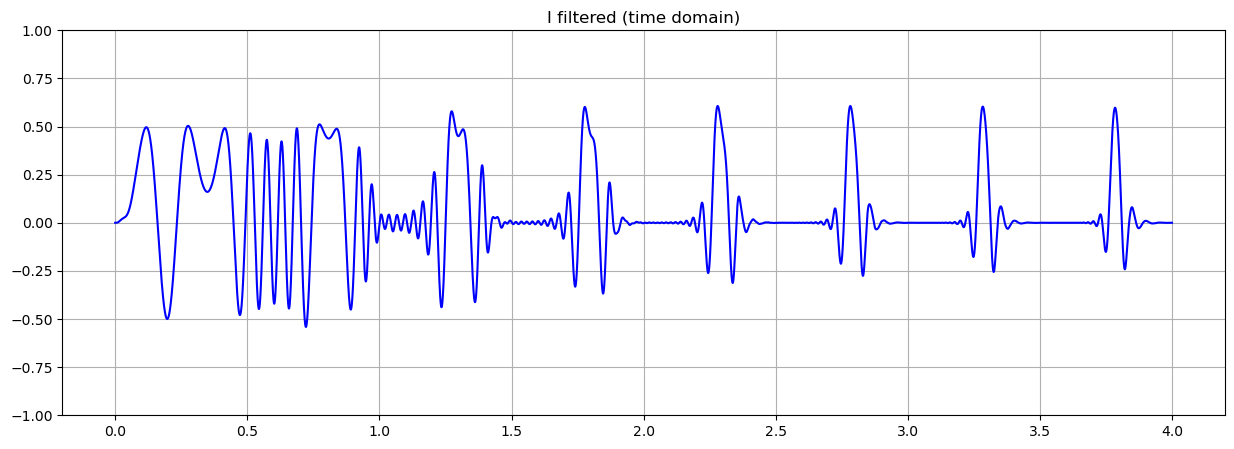

In [24]:
plt.figure(figsize = [15,5])
plt.plot(tvec,I_filtered,'b',label ='I')
plt.ylim(-1,1)
plt.title('I filtered (time domain)')

### Q filtered

Text(0.5, 1.0, 'Q filtered (time domain)')

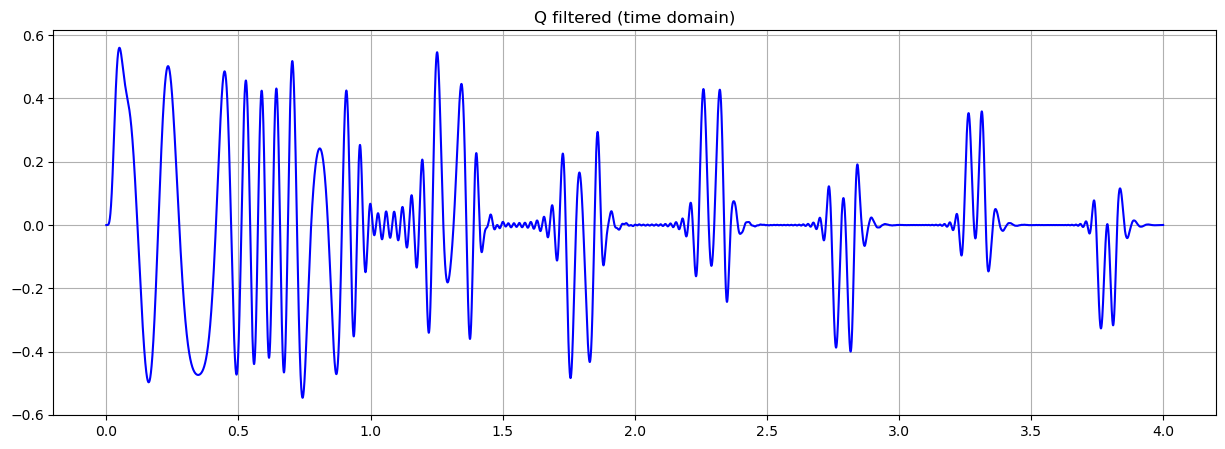

In [25]:
plt.figure(figsize = [15,5])
plt.plot(tvec,Q_filtered,'b',label ='I')
plt.title('Q filtered (time domain)')

## FM demodulated signal

In [26]:
phase_difference = np.arctan2(Q_filtered, I_filtered)

dt = tvec[1] - tvec[0]  # Time step
frequency_deviation = phase_difference / dt * (1/0.0001)

fc_lpf = 2*f_signal  # Cutoff frequency of the low-pass filter
b, a = signal.butter(5, fc_lpf/(10000/2), 'low')
frequency_deviation_filtered = signal.filtfilt(b, a, frequency_deviation)

fc_lpf = 2*f_signal  # Cutoff frequency of the low-pass filter
b, a = signal.butter(5, fc_lpf/(10000/2), 'low')
FM_demod_signal = signal.filtfilt(b, a, frequency_deviation_filtered)


### Time

Text(0.5, 1.0, 'Demodulated signal (time domain)')

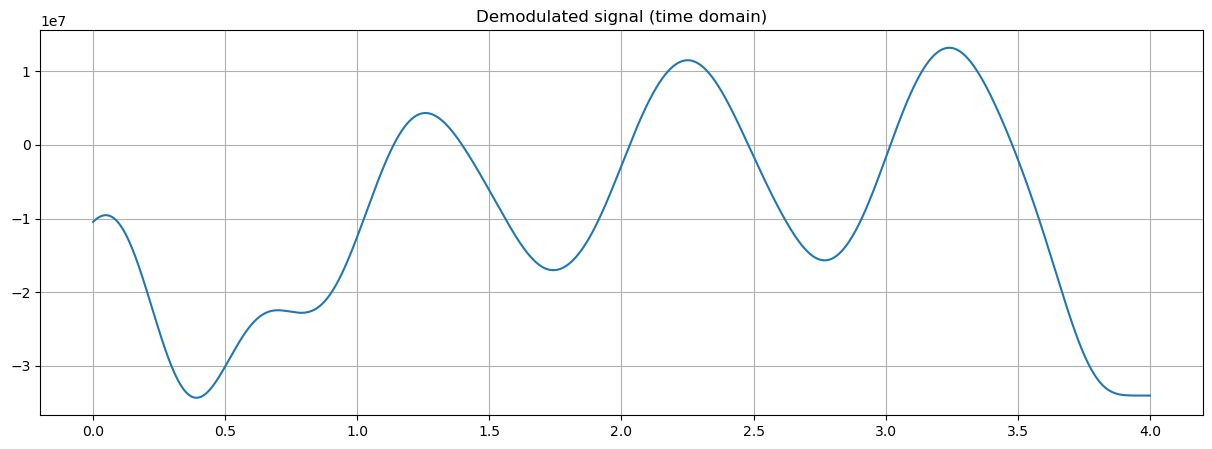

In [27]:
plt.figure(figsize = [15,5])
plt.plot(tvec,FM_demod_signal)
plt.title('Demodulated signal (time domain)')

## Frequency

C:\Users\abdel\AppData\Local\Temp\ipykernel_32456\512116765.py:5: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(fvec,FM_demod_signal_f,'r-')


Text(0.5, 1.0, 'Demodulated signal (frequency domain)')

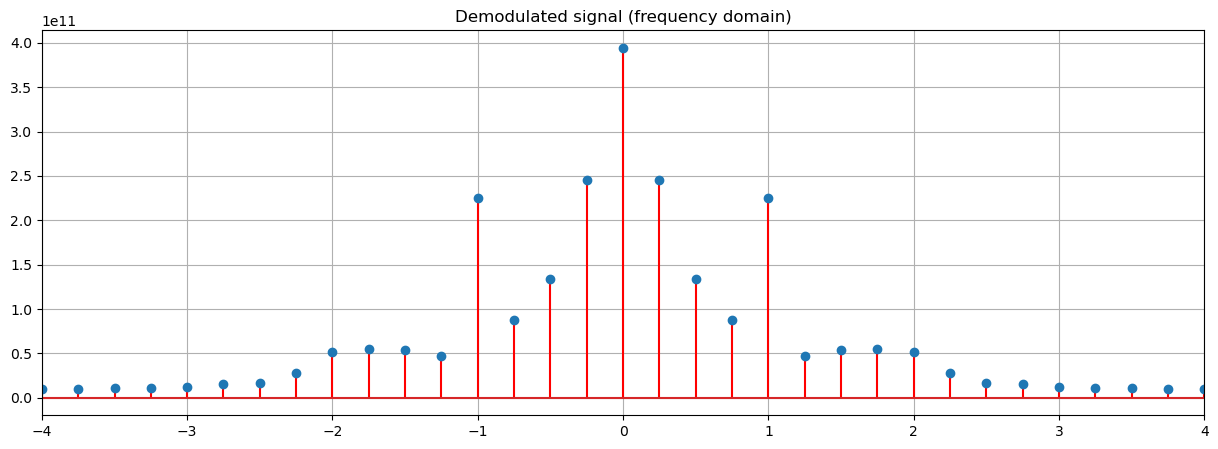

In [28]:
FM_demod_signal_f = np.abs(np.fft.fft(FM_demod_signal))
FM_demod_signal_f[FM_demod_signal_f<2000] = None

plt.figure(figsize = [15,5])
plt.stem(fvec,FM_demod_signal_f,'r-')
plt.xlim(-4,4)
plt.title('Demodulated signal (frequency domain)')